In [1]:
# import pakcages and libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('/content/framingham_clean_1.csv')
df.head()

,gender,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,tenyearchd
0,1,39,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Scaling for making close variables values from each other
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# choose index for only scaling numerical data
index = np.r_[1,4,9:15]
df.iloc[:, index] = scaler.fit_transform(df.iloc[:, index]) # apply fit() on X_train and transform fit on X_train 

In [4]:
print(df.iloc[0,:])

gender              1.000000
age                -1.234951
education           4.000000
current_smoker      0.000000
cigs_per_day       -0.763194
bp_meds             0.000000
prevalent_stroke    0.000000
prevalent_hyp       0.000000
diabetes            0.000000
tot_chol           -0.974747
sys_bp             -1.255196
dia_bp             -1.118089
bmi                 0.330699
heart_rate          0.365617
glucose            -0.245553
tenyearchd          0.000000
Name: 0, dtype: float64


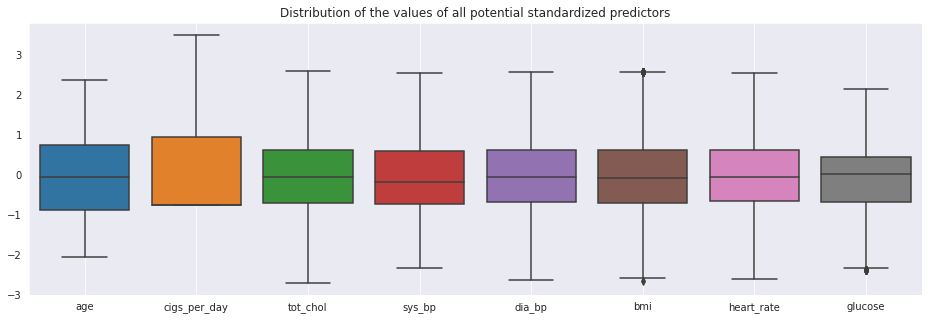

In [5]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df.iloc[:,index])
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

In [6]:
# independant and dependant variables
X = df.iloc[:,:-1].values # independent variables
y = df.iloc[:,-1].values # dependent variable

In [7]:
# Check whether the dataset is equally splitted or no
from collections import Counter
Counter(y)

Counter({0: 3594, 1: 644})

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

In [9]:
classifiers = []
classifiers.append(("LR",LogisticRegression()))
classifiers.append(("NB",GaussianNB()))
classifiers.append(("DT",DecisionTreeClassifier(random_state = 0)))
classifiers.append(("RF",RandomForestClassifier(random_state = 0)))
classifiers.append(("SVM",SVC()))
classifiers.append(("KNN", KNeighborsClassifier()))
scores = []
clf_names = []


In [10]:
my_list = [ 0.2, 0.25, 0.33, 0.4]
for clf in classifiers:
  score = 0
  recall = 0
  for p in my_list:
    for i in range(101):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = i)
      classifier = clf[1]
      classifier.fit(X_train,y_train)
      y_pred = classifier.predict(X_test)
      acc_score = (accuracy_score(y_test,y_pred)*100).round(2)
      rec_score = recall_score(y_test,y_pred)
      if acc_score > score:
          score = acc_score
          recall = rec_score
          paramters = (p, i, score, recall)
  p, i, score, recall = paramters
  print("classifier = {}, P = {}, i = {}, score = {}, recall = {}".format(classifier, p,i,score, recall))

classifier = LogisticRegression(), P = 0.2, i = 68, score = 87.62, recall = 0.037383177570093455
classifier = GaussianNB(), P = 0.2, i = 64, score = 85.02, recall = 0.23333333333333334
classifier = DecisionTreeClassifier(random_state=0), P = 0.2, i = 82, score = 79.25, recall = 0.2727272727272727
classifier = RandomForestClassifier(random_state=0), P = 0.2, i = 68, score = 87.26, recall = 0.037383177570093455
classifier = SVC(), P = 0.2, i = 68, score = 87.5, recall = 0.009345794392523364
classifier = KNeighborsClassifier(), P = 0.2, i = 68, score = 86.2, recall = 0.056074766355140186
